# Anac flight delay prediction

## Data Loading and Integration

This section loads the Brazilian ANAC VRA (Active Regular Flights) open dataset directly from the official data source.  
Monthly CSV files are dynamically retrieved for the selected year, validated for availability, and merged into a single DataFrame for further analysis.


In [ ]:
import pandas as pd
import requests
from urllib.parse import quote

# Base URL for ANAC open VRA (Active Regular Flights) dataset
BASE_URL = (
    "https://sistemas.anac.gov.br/dadosabertos/"
    "Voos%20e%20opera%C3%A7%C3%B5es%20a%C3%A9reas/"
    "Voo%20Regular%20Ativo%20%28VRA%29/"
)

# Month mapping required to match ANAC folder structure
MONTHS = {
    1: "Janeiro",
    2: "Fevereiro",
    3: "Março",
    4: "Abril",
    5: "Maio",
    6: "Junho",
    7: "Julho",
    8: "Agosto",
    9: "Setembro",
    10: "Outubro",
    11: "Novembro",
    12: "Dezembro",
}

# Years selected for analysis
YEARS = [2023,2024,2025]

dfs = []

def file_exists(url):
    """
    Check if a remote file exists before attempting download.
    This avoids runtime errors caused by missing monthly datasets.
    """
    try:
        r = requests.head(url, timeout=10)
        return r.status_code == 200
    except requests.RequestException:
        return False

# Download and load available monthly datasets
for year in YEARS:
    for month_num, month_name in MONTHS.items():

        folder = f"{month_num:02d} - {month_name}"
        filename = f"VRA_{year}{month_num}.csv"

        url = f"{BASE_URL}{year}/{quote(folder)}/{filename}"

        if not file_exists(url):
            print(f"❌ Missing: {year}-{month_num:02d}")
            continue

        print(f"✔️ Downloading {year}-{month_num:02d}")

        df = pd.read_csv(
            url,
            sep=";",
            encoding="utf-8",
            skiprows=1,
            low_memory=False
        )

        # Add explicit temporal identifiers for downstream analysis
        df["year"] = year
        df["month"] = month_num

        dfs.append(df)

# =========================
# FINAL MERGE
# =========================

# Combine all monthly datasets into a single DataFrame
df_final = pd.concat(dfs, ignore_index=True)

print("✅ All available VRA data merged")
print(df_final.shape)


✔️ Downloading 2023-01
✔️ Downloading 2023-02
✔️ Downloading 2023-03
✔️ Downloading 2023-04
✔️ Downloading 2023-05
✔️ Downloading 2023-06
✔️ Downloading 2023-07
✔️ Downloading 2023-08
✔️ Downloading 2023-09
✔️ Downloading 2023-10
✔️ Downloading 2023-11
✔️ Downloading 2023-12
✔️ Downloading 2024-01
✔️ Downloading 2024-02
✔️ Downloading 2024-03
✔️ Downloading 2024-04
✔️ Downloading 2024-05
✔️ Downloading 2024-06
✔️ Downloading 2024-07
✔️ Downloading 2024-08
✔️ Downloading 2024-09
✔️ Downloading 2024-10
✔️ Downloading 2024-11
✔️ Downloading 2024-12
✔️ Downloading 2025-01
✔️ Downloading 2025-02
✔️ Downloading 2025-03
✔️ Downloading 2025-04
✔️ Downloading 2025-05
✔️ Downloading 2025-06
✔️ Downloading 2025-07
✔️ Downloading 2025-08
✔️ Downloading 2025-09
✔️ Downloading 2025-10
✔️ Downloading 2025-11
✔️ Downloading 2025-12
✅ All available VRA data merged
(2975836, 14)


In [ ]:
df_final.to_parquet('vra_anac_2023_2025.parquet')

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/JessePMelo/anac-flight-delay-prediction/main/data_science/data/processed/vra_anac_2023_2025.parquet'

df_final = pd.read_parquet(url)

df = pd.read_parquet(url)

df_final = df.copy()

After loading, all available monthly datasets are consolidated into a single DataFrame, preserving temporal identifiers (`year` and `month`) to support downstream feature engineering and exploratory analysis.


## Initial Dataset Inspection

After consolidating all available monthly files, an initial inspection is performed to understand the dataset structure, column availability, and basic integrity before proceeding with data preparation.


In [2]:
df_final

,ICAO Empresa Aérea,Número Voo,Código Autorização (DI),Código Tipo Linha,ICAO Aeródromo Origem,ICAO Aeródromo Destino,Partida Prevista,Partida Real,Chegada Prevista,Chegada Real,Situação Voo,Código Justificativa,year,month
0,AZU,2913,0,N,SBFZ,SBRF,2023-01-24 05:40:00,2023-01-24 05:32:00,2023-01-24 07:00:00,2023-01-24 06:40:00,REALIZADO,NaN,2023,1
1,AZU,2913,0,N,SBFZ,SBRF,2023-01-25 05:40:00,2023-01-25 05:43:00,2023-01-25 07:00:00,2023-01-25 06:55:00,REALIZADO,NaN,2023,1
2,AZU,2913,0,N,SBFZ,SBRF,2023-01-26 05:40:00,2023-01-26 05:34:00,2023-01-26 07:00:00,2023-01-26 06:51:00,REALIZADO,NaN,2023,1
3,AZU,2913,0,N,SBFZ,SBRF,2023-01-27 05:40:00,2023-01-27 05:39:00,2023-01-27 07:00:00,2023-01-27 06:56:00,REALIZADO,NaN,2023,1
4,AZU,2913,0,N,SBFZ,SBRF,2023-01-28 05:40:00,2023-01-28 05:30:00,2023-01-28 07:00:00,2023-01-28 06:40:00,REALIZADO,NaN,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975831,TAM,9440,1,C,SBIL,SBGR,None,2025-12-31 16:12:00,None,2025-12-31 18:13:00,REALIZADO,NaN,2025,12
2975832,TPA,4057,2,X,SBEG,SKBO,None,2025-12-31 21:46:00,None,2026-01-01 00:24:00,REALIZADO,NaN,2025,12
2975833,TTL,5689,2,C,SBFL,SBPA,None,2025-12-31 05:20:00,None,2025-12-31 06:25:00,REALIZADO,NaN,2025,12
2975834,TTL,9900,6,C,SBRF,SBFZ,None,2025-12-31 09:10:00,None,2025-12-31 10:38:00,REALIZADO,NaN,2025,12


In [3]:
anac_df = df_final.copy()

In [4]:
anac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975836 entries, 0 to 2975835
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   ICAO Empresa Aérea       object 
 1   Número Voo               object 
 2   Código Autorização (DI)  object 
 3   Código Tipo Linha        object 
 4   ICAO Aeródromo Origem    object 
 5   ICAO Aeródromo Destino   object 
 6   Partida Prevista         object 
 7   Partida Real             object 
 8   Chegada Prevista         object 
 9   Chegada Real             object 
 10  Situação Voo             object 
 11  Código Justificativa     float64
 12  year                     int64  
 13  month                    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 317.9+ MB


In [5]:
anac_df.isna().sum()

,0
ICAO Empresa Aérea,0
Número Voo,0
Código Autorização (DI),0
Código Tipo Linha,474
ICAO Aeródromo Origem,0
ICAO Aeródromo Destino,0
Partida Prevista,96005
Partida Real,123846
Chegada Prevista,96007
Chegada Real,123846


## Missing Values Assessment

Before applying any transformations or filtering, missing values are evaluated to understand data completeness and identify columns that may require cleaning, imputation, or exclusion.


In [6]:
anac_df.isna().sum()

,0
ICAO Empresa Aérea,0
Número Voo,0
Código Autorização (DI),0
Código Tipo Linha,474
ICAO Aeródromo Origem,0
ICAO Aeródromo Destino,0
Partida Prevista,96005
Partida Real,123846
Chegada Prevista,96007
Chegada Real,123846


The inspection shows that missing values are concentrated in a limited set of operational columns.  
These results guide subsequent filtering and cleaning decisions applied in the data preparation stage.


## Removal of Irrelevant and Non-Informative Columns

Some columns in the original dataset do not contribute to the delay prediction objective or are outside the scope of the current analysis. These fields are removed to reduce noise and simplify downstream processing.


In [7]:
anac_df = anac_df.drop(columns=[
    'Código Autorização (DI)',
    'Código Tipo Linha',
    'Chegada Prevista',
    'Chegada Real',
    'Código Justificativa'
])


## Filtering Completed Flights

Only flights with status `REALIZADO` (completed flights) are retained for analysis.  
Canceled or non-completed flights are excluded, as departure delay cannot be reliably measured for these cases.


In [8]:
anac_df = anac_df[anac_df['Situação Voo']=='REALIZADO']

In [9]:
anac_df

,ICAO Empresa Aérea,Número Voo,ICAO Aeródromo Origem,ICAO Aeródromo Destino,Partida Prevista,Partida Real,Situação Voo,year,month
0,AZU,2913,SBFZ,SBRF,2023-01-24 05:40:00,2023-01-24 05:32:00,REALIZADO,2023,1
1,AZU,2913,SBFZ,SBRF,2023-01-25 05:40:00,2023-01-25 05:43:00,REALIZADO,2023,1
2,AZU,2913,SBFZ,SBRF,2023-01-26 05:40:00,2023-01-26 05:34:00,REALIZADO,2023,1
3,AZU,2913,SBFZ,SBRF,2023-01-27 05:40:00,2023-01-27 05:39:00,REALIZADO,2023,1
4,AZU,2913,SBFZ,SBRF,2023-01-28 05:40:00,2023-01-28 05:30:00,REALIZADO,2023,1
...,...,...,...,...,...,...,...,...,...
2975831,TAM,9440,SBIL,SBGR,None,2025-12-31 16:12:00,REALIZADO,2025,12
2975832,TPA,4057,SBEG,SKBO,None,2025-12-31 21:46:00,REALIZADO,2025,12
2975833,TTL,5689,SBFL,SBPA,None,2025-12-31 05:20:00,REALIZADO,2025,12
2975834,TTL,9900,SBRF,SBFZ,None,2025-12-31 09:10:00,REALIZADO,2025,12


This filtering step ensures consistency between the target variable definition and the operational scope of the dataset.


## Removal of Incomplete Records

Records containing missing values are removed to ensure data consistency and avoid introducing bias through artificial imputation.  
Given the operational nature of the dataset, incomplete records cannot be reliably corrected and are excluded from further analysis.


In [10]:
anac_df = anac_df.dropna()

In [11]:
anac_df

,ICAO Empresa Aérea,Número Voo,ICAO Aeródromo Origem,ICAO Aeródromo Destino,Partida Prevista,Partida Real,Situação Voo,year,month
0,AZU,2913,SBFZ,SBRF,2023-01-24 05:40:00,2023-01-24 05:32:00,REALIZADO,2023,1
1,AZU,2913,SBFZ,SBRF,2023-01-25 05:40:00,2023-01-25 05:43:00,REALIZADO,2023,1
2,AZU,2913,SBFZ,SBRF,2023-01-26 05:40:00,2023-01-26 05:34:00,REALIZADO,2023,1
3,AZU,2913,SBFZ,SBRF,2023-01-27 05:40:00,2023-01-27 05:39:00,REALIZADO,2023,1
4,AZU,2913,SBFZ,SBRF,2023-01-28 05:40:00,2023-01-28 05:30:00,REALIZADO,2023,1
...,...,...,...,...,...,...,...,...,...
2975753,ACA,0096,CYUL,SBGR,2025-12-20 22:55:00,2025-12-20 23:35:00,REALIZADO,2025,12
2975754,ACA,0096,CYUL,SBGR,2025-12-21 22:55:00,2025-12-21 22:59:00,REALIZADO,2025,12
2975755,ACA,0096,CYUL,SBGR,2025-12-22 22:55:00,2025-12-22 23:10:00,REALIZADO,2025,12
2975756,ACA,0096,CYUL,SBGR,2025-12-23 22:55:00,2025-12-23 23:04:00,REALIZADO,2025,12


In [12]:
anac_df.isna().sum()

,0
ICAO Empresa Aérea,0
Número Voo,0
ICAO Aeródromo Origem,0
ICAO Aeródromo Destino,0
Partida Prevista,0
Partida Real,0
Situação Voo,0
year,0
month,0


This step results in a clean dataset where all remaining records contain the minimum required information for delay calculation and feature engineering.


## Data Type Standardization

Data types are explicitly standardized to ensure semantic correctness, memory efficiency, and compatibility with downstream feature engineering and modeling steps.


In [13]:
# Create an explicit copy to avoid chained assignment issues
anac_df = anac_df.copy()

# Columns representing identifiers and categorical attributes
category_cols = [
    'ICAO Empresa Aérea',
    'Número Voo',
    'ICAO Aeródromo Origem',
    'ICAO Aeródromo Destino',
    'Situação Voo'
]

# Cast categorical features to pandas 'category' dtype
anac_df[category_cols] = anac_df[category_cols].astype('category')

# Datetime columns used for delay calculation and temporal feature extraction
datetime_cols = [
    'Partida Prevista',
    'Partida Real'
]


Explicit type casting ensures consistent behavior across the data preparation pipeline and prevents ambiguity during feature extraction and modeling.


In [14]:
anac_df[category_cols] = anac_df[category_cols].astype('category')

In [15]:
anac_df[datetime_cols] = anac_df[datetime_cols].apply(
    pd.to_datetime,
    dayfirst=True,
    errors='coerce'
)

/tmp/ipython-input-3052966532.py:1: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  anac_df[datetime_cols] = anac_df[datetime_cols].apply(
/tmp/ipython-input-3052966532.py:1: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  anac_df[datetime_cols] = anac_df[datetime_cols].apply(


In [16]:
anac_df['year'] = anac_df['year'].astype('int16')
anac_df['month'] = anac_df['month'].astype('int8')

In [17]:
anac_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2755985 entries, 0 to 2975757
Data columns (total 9 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   ICAO Empresa Aérea      category      
 1   Número Voo              category      
 2   ICAO Aeródromo Origem   category      
 3   ICAO Aeródromo Destino  category      
 4   Partida Prevista        datetime64[ns]
 5   Partida Real            datetime64[ns]
 6   Situação Voo            category      
 7   year                    int16         
 8   month                   int8          
dtypes: category(5), datetime64[ns](2), int16(1), int8(1)
memory usage: 95.0 MB


## Departure Delay Calculation

The departure delay is computed as the difference between the actual and scheduled departure times.  
This continuous variable represents the foundation for defining the target variable and supports both exploratory analysis and feature engineering.


In [18]:
anac_df['delay_minutes'] = (
    anac_df['Partida Real'] - anac_df['Partida Prevista']
).dt.total_seconds() / 60


Positive values indicate delayed departures, while negative values represent early departures.  
This feature is used exclusively for target definition and exploratory analysis and is excluded from the modeling feature set to prevent data leakage.


## Target Variable Definition

A binary target variable is defined based on a delay threshold of 15 minutes.  
Flights departing more than 15 minutes after the scheduled time are labeled as delayed.


In [19]:
anac_df['is_delayed'] = (anac_df['delay_minutes'] > 15).astype('int8')

This binary formulation enables the use of classification models such as logistic regression, while maintaining interpretability and alignment with common operational delay definitions.


## Day of Week Extraction

The day of the week is extracted from the scheduled departure time to capture weekly operational patterns that may influence flight delays.


In [20]:
anac_df

,ICAO Empresa Aérea,Número Voo,ICAO Aeródromo Origem,ICAO Aeródromo Destino,Partida Prevista,Partida Real,Situação Voo,year,month,delay_minutes,is_delayed
0,AZU,2913,SBFZ,SBRF,2023-01-24 05:40:00,2023-01-24 05:32:00,REALIZADO,2023,1,-8.0,0
1,AZU,2913,SBFZ,SBRF,2023-01-25 05:40:00,2023-01-25 05:43:00,REALIZADO,2023,1,3.0,0
2,AZU,2913,SBFZ,SBRF,2023-01-26 05:40:00,2023-01-26 05:34:00,REALIZADO,2023,1,-6.0,0
3,AZU,2913,SBFZ,SBRF,2023-01-27 05:40:00,2023-01-27 05:39:00,REALIZADO,2023,1,-1.0,0
4,AZU,2913,SBFZ,SBRF,2023-01-28 05:40:00,2023-01-28 05:30:00,REALIZADO,2023,1,-10.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2975753,ACA,0096,CYUL,SBGR,2025-12-20 22:55:00,2025-12-20 23:35:00,REALIZADO,2025,12,40.0,1
2975754,ACA,0096,CYUL,SBGR,2025-12-21 22:55:00,2025-12-21 22:59:00,REALIZADO,2025,12,4.0,0
2975755,ACA,0096,CYUL,SBGR,2025-12-22 22:55:00,2025-12-22 23:10:00,REALIZADO,2025,12,15.0,0
2975756,ACA,0096,CYUL,SBGR,2025-12-23 22:55:00,2025-12-23 23:04:00,REALIZADO,2025,12,9.0,0


In [21]:
anac_df['day_of_week'] = (
    anac_df['Partida Real']
    .dt.dayofweek
    .astype('Int8')
)


The feature ranges from 0 (Monday) to 6 (Sunday) and allows the model to learn differences in delay behavior across weekdays and weekends.


## Temporal Feature Engineering

Multiple calendar-based features are derived from the scheduled departure time to capture seasonal, weekly, and intraday patterns associated with flight delays.


In [22]:
anac_df['week_of_year'] = (
    anac_df['Partida Real']
    .dt.isocalendar()
    .week
    .astype('Int8')
)


In [23]:
anac_df['week_of_month'] = (
    ((anac_df['Partida Real'].dt.day - 1) // 7 + 1)
    .astype('Int8')
)


In [24]:
anac_df['hour'] = (
    anac_df['Partida Real']
    .dt.hour
    .astype('Int8')
)


In [25]:
anac_df['is_weekend'] = (
    anac_df['day_of_week'] >= 5
).astype('Int8')


In [26]:
anac_df['day_of_year'] = (
    anac_df['Partida Real']
    .dt.dayofyear
    .astype('Int16')
)


In [27]:
import pandas as pd
import holidays

# Garantir datetime
anac_df['Partida Prevista'] = pd.to_datetime(
    anac_df['Partida Prevista'],
    errors='coerce'
)

# Datas normalizadas
dates = anac_df['Partida Prevista'].dt.normalize()

# 🔥 Pegar anos reais do dataset
years = dates.dt.year.dropna().unique()

# Criar calendário apenas para esses anos
br_holidays = holidays.Brazil(years=years)

# Converter para DatetimeIndex
holiday_dates = pd.DatetimeIndex(br_holidays.keys()).normalize()

# ------------------------
# Features
# ------------------------

anac_df['is_holiday'] = (
    dates.isin(holiday_dates)
    .astype('Int8')
)

anac_df['is_pre_holiday'] = (
    (dates + pd.Timedelta(days=1))
    .isin(holiday_dates)
    .astype('Int8')
)

anac_df['is_post_holiday'] = (
    (dates - pd.Timedelta(days=1))
    .isin(holiday_dates)
    .astype('Int8')
)


In [28]:
anac_df

,ICAO Empresa Aérea,Número Voo,ICAO Aeródromo Origem,ICAO Aeródromo Destino,Partida Prevista,Partida Real,Situação Voo,year,month,delay_minutes,is_delayed,day_of_week,week_of_year,week_of_month,hour,is_weekend,day_of_year,is_holiday,is_pre_holiday,is_post_holiday
0,AZU,2913,SBFZ,SBRF,2023-01-24 05:40:00,2023-01-24 05:32:00,REALIZADO,2023,1,-8.0,0,1,4,4,5,0,24,0,0,0
1,AZU,2913,SBFZ,SBRF,2023-01-25 05:40:00,2023-01-25 05:43:00,REALIZADO,2023,1,3.0,0,2,4,4,5,0,25,0,0,0
2,AZU,2913,SBFZ,SBRF,2023-01-26 05:40:00,2023-01-26 05:34:00,REALIZADO,2023,1,-6.0,0,3,4,4,5,0,26,0,0,0
3,AZU,2913,SBFZ,SBRF,2023-01-27 05:40:00,2023-01-27 05:39:00,REALIZADO,2023,1,-1.0,0,4,4,4,5,0,27,0,0,0
4,AZU,2913,SBFZ,SBRF,2023-01-28 05:40:00,2023-01-28 05:30:00,REALIZADO,2023,1,-10.0,0,5,4,4,5,1,28,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975753,ACA,0096,CYUL,SBGR,2025-12-20 22:55:00,2025-12-20 23:35:00,REALIZADO,2025,12,40.0,1,5,51,3,23,1,354,0,0,0
2975754,ACA,0096,CYUL,SBGR,2025-12-21 22:55:00,2025-12-21 22:59:00,REALIZADO,2025,12,4.0,0,6,51,3,22,1,355,0,0,0
2975755,ACA,0096,CYUL,SBGR,2025-12-22 22:55:00,2025-12-22 23:10:00,REALIZADO,2025,12,15.0,0,0,52,4,23,0,356,0,0,0
2975756,ACA,0096,CYUL,SBGR,2025-12-23 22:55:00,2025-12-23 23:04:00,REALIZADO,2025,12,9.0,0,1,52,4,23,0,357,0,0,0


All temporal features are extracted exclusively from scheduled departure times to avoid information leakage and ensure model validity.


## Removal of Leakage-Prone and Non-Modeling Features

Columns that either introduce data leakage or are no longer required after feature extraction are removed to ensure a clean, model-ready dataset.


In [29]:
cols_to_drop = [
    'Partida Prevista',
    'Partida Real',
    'delay_minutes',
    'Situação Voo',
]

anac_df = anac_df.drop(columns=cols_to_drop)


After this step, the dataset contains only features available at prediction time, fully aligned with the modeling objective.


## Final Dataset Validation

A final inspection is performed to confirm data integrity, data types, and overall readiness for modeling.


In [30]:
anac_df.head()

,ICAO Empresa Aérea,Número Voo,ICAO Aeródromo Origem,ICAO Aeródromo Destino,year,month,is_delayed,day_of_week,week_of_year,week_of_month,hour,is_weekend,day_of_year,is_holiday,is_pre_holiday,is_post_holiday
0,AZU,2913,SBFZ,SBRF,2023,1,0,1,4,4,5,0,24,0,0,0
1,AZU,2913,SBFZ,SBRF,2023,1,0,2,4,4,5,0,25,0,0,0
2,AZU,2913,SBFZ,SBRF,2023,1,0,3,4,4,5,0,26,0,0,0
3,AZU,2913,SBFZ,SBRF,2023,1,0,4,4,4,5,0,27,0,0,0
4,AZU,2913,SBFZ,SBRF,2023,1,0,5,4,4,5,1,28,0,0,0


In [31]:
anac_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2755985 entries, 0 to 2975757
Data columns (total 16 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   ICAO Empresa Aérea      category
 1   Número Voo              category
 2   ICAO Aeródromo Origem   category
 3   ICAO Aeródromo Destino  category
 4   year                    int16   
 5   month                   int8    
 6   is_delayed              int8    
 7   day_of_week             Int8    
 8   week_of_year            Int8    
 9   week_of_month           Int8    
 10  hour                    Int8    
 11  is_weekend              Int8    
 12  day_of_year             Int16   
 13  is_holiday              Int8    
 14  is_pre_holiday          Int8    
 15  is_post_holiday         Int8    
dtypes: Int16(1), Int8(8), category(4), int16(1), int8(2)
memory usage: 102.8 MB


## ETL V2

In [32]:
rename_map = {
    'ICAO Empresa Aérea': 'airline',
    'Número Voo': 'flight_number',
    'ICAO Aeródromo Origem': 'origin_airport',
    'ICAO Aeródromo Destino': 'destination_airport',
}

anac_df = anac_df.rename(columns=rename_map)

In [33]:
anac_df['airline'] = anac_df['airline'].astype('string')
anac_df['origin_airport'] = anac_df['origin_airport'].astype('string')
anac_df['flight_number'] = anac_df['flight_number'].astype('string')
anac_df['destination_airport'] = anac_df['destination_airport'].astype('string')

In [34]:
anac_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2755985 entries, 0 to 2975757
Data columns (total 16 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   airline              string
 1   flight_number        string
 2   origin_airport       string
 3   destination_airport  string
 4   year                 int16 
 5   month                int8  
 6   is_delayed           int8  
 7   day_of_week          Int8  
 8   week_of_year         Int8  
 9   week_of_month        Int8  
 10  hour                 Int8  
 11  is_weekend           Int8  
 12  day_of_year          Int16 
 13  is_holiday           Int8  
 14  is_pre_holiday       Int8  
 15  is_post_holiday      Int8  
dtypes: Int16(1), Int8(8), int16(1), int8(2), string(4)
memory usage: 165.6 MB


In [35]:
anac_df['route'] = anac_df['origin_airport'].astype('string') + "_" + anac_df['destination_airport'].astype('string')
anac_df['origin_hour'] = anac_df['origin_airport'].astype('string') + "_" + anac_df['hour'].astype('string')

In [36]:
anac_df['isWeekend_hour'] = anac_df['is_weekend'] * anac_df['hour']

anac_df['holiday_hour'] = anac_df['is_holiday'] * anac_df['hour']

anac_df['preholiday_hour'] = anac_df['is_pre_holiday'] * anac_df['hour']

anac_df['postholiday_hour'] = anac_df['is_post_holiday'] * anac_df['hour']

In [37]:
anac_df['airline_hour'] = anac_df['airline'].astype('string') + "_" + anac_df['hour'].astype('string')

In [38]:
anac_df['route_holiday'] = anac_df['route'] + "_" + anac_df['is_holiday'].astype('string')

In [39]:
import numpy as np

anac_df['hour_sin'] = np.sin(2 * np.pi * anac_df['hour'] / 24)
anac_df['hour_cos'] = np.cos(2 * np.pi * anac_df['hour'] / 24)

In [40]:
anac_df['is_first_wave'] = (anac_df['hour'] <= 7).astype(int)
anac_df['is_last_wave'] = (anac_df['hour'] >= 20).astype(int)

Sinal congestionamento

In [41]:
anac_df['origin_volume'] = anac_df.groupby('origin_airport')['origin_airport'].transform('count')

anac_df['destination_volume'] = anac_df.groupby('destination_airport')['destination_airport'].transform('count')

anac_df['route_volume'] = anac_df.groupby('route')['route'].transform('count')

anac_df['airline_delay_rate'] = anac_df.groupby('airline')['is_delayed'].transform('mean')

anac_df['hour_delay_rate'] = anac_df.groupby('hour')['is_delayed'].transform('mean')


## CORR

In [42]:
corr_matrix = anac_df.corr(numeric_only=True)

corr_with_target = corr_matrix['is_delayed'].sort_values(ascending=False)

corr_with_target


,is_delayed
is_delayed,1.000000
hour_delay_rate,0.150236
airline_delay_rate,0.132154
hour,0.104278
is_last_wave,0.067188
origin_volume,0.050716
hour_cos,0.044710
week_of_year,0.040717
day_of_year,0.039622
month,0.039350


## VIF

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# 1️⃣ Selecionar apenas numéricas (exceto target)
X_vif = (
    anac_df
    .drop(columns=['is_delayed'])
    .select_dtypes(include=['int64', 'Int8', 'Int16', 'float64'])
    .copy()
)

# 2️⃣ Converter tudo para float (obrigatório para VIF)
X_vif = X_vif.astype(float)

# 3️⃣ Remover colunas constantes (evita erro)
X_vif = X_vif.loc[:, X_vif.nunique() > 1]

# 4️⃣ Usar SAMPLE para evitar estouro de RAM
sample_size = 100_000  # pode reduzir para 50_000 se quiser
X_vif_sample = X_vif.sample(
    n=min(sample_size, len(X_vif)),
    random_state=42
)

# 5️⃣ Calcular VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif_sample.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif_sample.values, i)
    for i in range(X_vif_sample.shape[1])
]

# 6️⃣ Ordenar
vif_data = vif_data.sort_values(by="VIF", ascending=False)

vif_data


,feature,VIF
1,month,6146.470344
7,day_of_year,5522.357684
0,year,309.579004
5,hour,72.153395
3,week_of_year,68.761063
4,week_of_month,54.918606
23,hour_delay_rate,46.778240
22,airline_delay_rate,13.181079
6,is_weekend,9.814904
15,hour_sin,9.555068


In [44]:
cols_to_drop = [
    'month',
    'day_of_year',
    'week_of_year',
    'week_of_month',
    'hour',
    'origin_hour',
    'airline_hour',
    'route_holiday',
    'isWeekend_hour',
    'holiday_hour',
    'preholiday_hour',
    'postholiday_hour',
    'route',
    'flight_number'
]

anac_df = anac_df.drop(columns=cols_to_drop)


In [45]:
anac_df.head(5)

,airline,origin_airport,destination_airport,year,is_delayed,day_of_week,is_weekend,is_holiday,is_pre_holiday,is_post_holiday,hour_sin,hour_cos,is_first_wave,is_last_wave,origin_volume,destination_volume,route_volume,airline_delay_rate,hour_delay_rate
0,AZU,SBFZ,SBRF,2023,0,1,0,0,0,0,0.965926,0.258819,1,0,57785,113579,6563,0.143402,0.053112
1,AZU,SBFZ,SBRF,2023,0,2,0,0,0,0,0.965926,0.258819,1,0,57785,113579,6563,0.143402,0.053112
2,AZU,SBFZ,SBRF,2023,0,3,0,0,0,0,0.965926,0.258819,1,0,57785,113579,6563,0.143402,0.053112
3,AZU,SBFZ,SBRF,2023,0,4,0,0,0,0,0.965926,0.258819,1,0,57785,113579,6563,0.143402,0.053112
4,AZU,SBFZ,SBRF,2023,0,5,1,0,0,0,0.965926,0.258819,1,0,57785,113579,6563,0.143402,0.053112


### Separar grupos de colunas

In [46]:
categorical_cols = [
    'airline',
    'origin_airport',
    'destination_airport',

]

binary_cols = [
    'is_weekend',
    'is_holiday',
    'is_pre_holiday',
    'is_post_holiday',
    'is_first_wave',
    'is_last_wave'
]

continuous_cols = [
    'day_of_week',
    'hour_sin',
    'hour_cos',
    'origin_volume',
    'destination_volume',
    'route_volume',
    'airline_delay_rate',
    'hour_delay_rate'
]



In [47]:
for col in categorical_cols:
    anac_df[col] = anac_df[col].astype('category')

for col in continuous_cols:
    anac_df[col] = anac_df[col].astype(float)


## Preprocessor

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

preprocessor = ColumnTransformer(
    transformers=[
        ('cont', StandardScaler(), continuous_cols),
        ('bin', 'passthrough', binary_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


## Model

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

rl_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        penalty='l2',
        C=0.5,
        solver='saga',          # Melhor para muitos dados + sparse
        max_iter=500,           # 1000 é desnecessário na maioria dos casos
        class_weight='balanced',
        n_jobs=-1,              # Usa todos os núcleos
        random_state=42
    ))
])


In [50]:
train = anac_df[anac_df['year'].isin([2023, 2024])].copy()
test  = anac_df[anac_df['year'] == 2025].copy()

X_train = train.drop(columns=['is_delayed','year'])
y_train = train['is_delayed']

X_test = test.drop(columns=['is_delayed','year'])
y_test = test['is_delayed']


## Treinar

In [51]:
rl_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cont', StandardScaler(),
                                                  ['day_of_week', 'hour_sin',
                                                   'hour_cos', 'origin_volume',
                                                   'destination_volume',
                                                   'route_volume',
                                                   'airline_delay_rate',
                                                   'hour_delay_rate']),
                                                 ('bin', 'passthrough',
                                                  ['is_weekend', 'is_holiday',
                                                   'is_pre_holiday',
                                                   'is_post_holiday',
                                                   'is_first_wave',
                                                   'is_last_wave']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['airline', 'origin_airport',
                                                   'destination_airport'])])),
                ('classifier',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    max_iter=500, n_jobs=-1, random_state=42,
                                    solver='saga'))])

## Fazer previsões

In [52]:

from sklearn.metrics import classification_report, roc_auc_score

y_pred_rl = rl_model.predict(X_test)
y_proba_rl = rl_model.predict_proba(X_test)[:, 1]

auc_rl = roc_auc_score(y_test, y_proba_rl)



## Métricas

In [53]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_rl))
print("AUC:", roc_auc_score(y_test, y_proba_rl))


              precision    recall  f1-score   support

           0       0.89      0.61      0.72    805788
           1       0.21      0.59      0.31    143020

    accuracy                           0.60    948808
   macro avg       0.55      0.60      0.52    948808
weighted avg       0.79      0.60      0.66    948808

AUC: 0.6379666804731535


In [54]:
import numpy as np
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_rl)

for i in range(0, len(thresholds), len(thresholds)//10):
    print(f"Threshold: {thresholds[i]:.3f} | Precision: {precision[i]:.3f} | Recall: {recall[i]:.3f}")


Threshold: 0.039 | Precision: 0.151 | Recall: 1.000
Threshold: 0.261 | Precision: 0.161 | Recall: 0.974
Threshold: 0.326 | Precision: 0.172 | Recall: 0.924
Threshold: 0.380 | Precision: 0.181 | Recall: 0.856
Threshold: 0.425 | Precision: 0.191 | Recall: 0.778
Threshold: 0.466 | Precision: 0.201 | Recall: 0.685
Threshold: 0.505 | Precision: 0.212 | Recall: 0.577
Threshold: 0.546 | Precision: 0.224 | Recall: 0.453
Threshold: 0.594 | Precision: 0.239 | Recall: 0.301
Threshold: 0.679 | Precision: 0.239 | Recall: 0.119
Threshold: 0.982 | Precision: 0.000 | Recall: 0.000


In [55]:
best_threshold = 0.45
y_pred_custom = (y_proba_rl >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_custom))
print("AUC:", roc_auc_score(y_test, y_proba_rl))


              precision    recall  f1-score   support

           0       0.91      0.48      0.62    805788
           1       0.20      0.72      0.31    143020

    accuracy                           0.51    948808
   macro avg       0.55      0.60      0.47    948808
weighted avg       0.80      0.51      0.58    948808

AUC: 0.6379666804731535


In [56]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_rl))
print("AUC:", roc_auc_score(y_test, y_proba_rl))


              precision    recall  f1-score   support

           0       0.89      0.61      0.72    805788
           1       0.21      0.59      0.31    143020

    accuracy                           0.60    948808
   macro avg       0.55      0.60      0.52    948808
weighted avg       0.79      0.60      0.66    948808

AUC: 0.6379666804731535


XGboost

In [57]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight
)

pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

pipeline_xgb.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cont', StandardScaler(),
                                                  ['day_of_week', 'hour_sin',
                                                   'hour_cos', 'origin_volume',
                                                   'destination_volume',
                                                   'route_volume',
                                                   'airline_delay_rate',
                                                   'hour_delay_rate']),
                                                 ('bin', 'passthrough',
                                                  ['is_weekend', 'is_holiday',
                                                   'is_pre_holiday',
                                                   'is_post_holiday',
                                                   'is_first_wave',
                                                   'is_last_wave']),
                                                 ('cat',
                                                  OneHotEn...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [58]:
y_pred_xgb = pipeline_xgb.predict(X_test)
y_proba_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]

auc_xgb = roc_auc_score(y_test, y_proba_xgb)


In [59]:
import numpy as np
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_xgb)

for i in range(0, len(thresholds), len(thresholds)//10):
    print(f"Threshold: {thresholds[i]:.3f} | Precision: {precision[i]:.3f} | Recall: {recall[i]:.3f}")


Threshold: 0.036 | Precision: 0.151 | Recall: 1.000
Threshold: 0.248 | Precision: 0.165 | Recall: 0.977
Threshold: 0.319 | Precision: 0.178 | Recall: 0.932
Threshold: 0.381 | Precision: 0.189 | Recall: 0.880
Threshold: 0.428 | Precision: 0.201 | Recall: 0.806
Threshold: 0.469 | Precision: 0.214 | Recall: 0.708
Threshold: 0.511 | Precision: 0.231 | Recall: 0.596
Threshold: 0.557 | Precision: 0.252 | Recall: 0.467
Threshold: 0.610 | Precision: 0.280 | Recall: 0.318
Threshold: 0.699 | Precision: 0.310 | Recall: 0.134
Threshold: 0.975 | Precision: 0.000 | Recall: 0.000


In [60]:
best_threshold = 0.470
y_pred_custom = (y_proba_xgb >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_custom))
print("AUC:", roc_auc_score(y_test, y_proba_xgb))





              precision    recall  f1-score   support

           0       0.91      0.54      0.68    805788
           1       0.21      0.71      0.33    143020

    accuracy                           0.57    948808
   macro avg       0.56      0.62      0.50    948808
weighted avg       0.81      0.57      0.63    948808

AUC: 0.6750638945697325


In [61]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_xgb))
print("AUC:", roc_auc_score(y_test, y_proba_xgb))




              precision    recall  f1-score   support

           0       0.90      0.62      0.74    805788
           1       0.23      0.63      0.33    143020

    accuracy                           0.62    948808
   macro avg       0.56      0.62      0.53    948808
weighted avg       0.80      0.62      0.67    948808

AUC: 0.6750638945697325


## Explicabilida modelo

Comparando classification report RL e XGB

In [62]:
# Default
report_rl_default = classification_report(y_test, y_pred_rl, output_dict=True)
report_xgb_default = classification_report(y_test, y_pred_xgb, output_dict=True)

# Custom threshold
best_threshold_rl = 0.45
y_pred_rl_custom = (y_proba_rl >= best_threshold_rl).astype(int)
report_rl_custom = classification_report(y_test, y_pred_rl_custom, output_dict=True)

best_threshold_xgb = 0.470
y_pred_xgb_custom = (y_proba_xgb >= best_threshold_xgb).astype(int)
report_xgb_custom = classification_report(y_test, y_pred_xgb_custom, output_dict=True)



In [63]:
comparison = pd.DataFrame({
    "Model": [
        "Logistic (0.5)",
        "Logistic (Custom)",
        "XGBoost (0.5)",
        "XGBoost (Custom)"
    ],

    "Precision (Class 1)": [
        report_rl_default["1"]["precision"],
        report_rl_custom["1"]["precision"],
        report_xgb_default["1"]["precision"],
        report_xgb_custom["1"]["precision"]
    ],

    "Recall (Class 1)": [
        report_rl_default["1"]["recall"],
        report_rl_custom["1"]["recall"],
        report_xgb_default["1"]["recall"],
        report_xgb_custom["1"]["recall"]
    ],

    "F1-score (Class 1)": [
        report_rl_default["1"]["f1-score"],
        report_rl_custom["1"]["f1-score"],
        report_xgb_default["1"]["f1-score"],
        report_xgb_custom["1"]["f1-score"]
    ],

    "Accuracy": [
        report_rl_default["accuracy"],
        report_rl_custom["accuracy"],
        report_xgb_default["accuracy"],
        report_xgb_custom["accuracy"]
    ],

    "AUC": [
        auc_rl,
        auc_rl,
        auc_xgb,
        auc_xgb
    ]
})

comparison.round(3)


,Model,Precision (Class 1),Recall (Class 1),F1-score (Class 1),Accuracy,AUC
0,Logistic (0.5),0.210,0.592,0.310,0.604,0.638
1,Logistic (Custom),0.197,0.723,0.309,0.513,0.638
2,XGBoost (0.5),0.226,0.626,0.332,0.621,0.675
3,XGBoost (Custom),0.215,0.706,0.329,0.567,0.675


Coef_ RL

In [64]:
import numpy as np
import pandas as pd

# Pegar nomes das features após OneHot
ohe = rl_model.named_steps['preprocessor'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(categorical_cols)

all_features = (
    continuous_cols +
    binary_cols +
    list(ohe_features)
)

# Pegar coeficientes
coef = rl_model.named_steps['classifier'].coef_[0]

coef_df = pd.DataFrame({
    "feature": all_features,
    "coefficient": coef
}).sort_values(by="coefficient", key=abs, ascending=False)

coef_df.to_csv('coef_rl.csv', index=False)
coef_df

,feature,coefficient
523,destination_airport_KCVG,-3.238511
180,origin_airport_KCVG,-2.734156
481,origin_airport_ZBAA,2.550995
218,origin_airport_MDSD,-2.264394
272,origin_airport_SBCO,-2.252552
...,...,...
300,origin_airport_SBJR,-0.004117
624,destination_airport_SBCY,-0.004097
661,destination_airport_SBMO,-0.002203
672,destination_airport_SBPJ,-0.001459


Shap RL Global

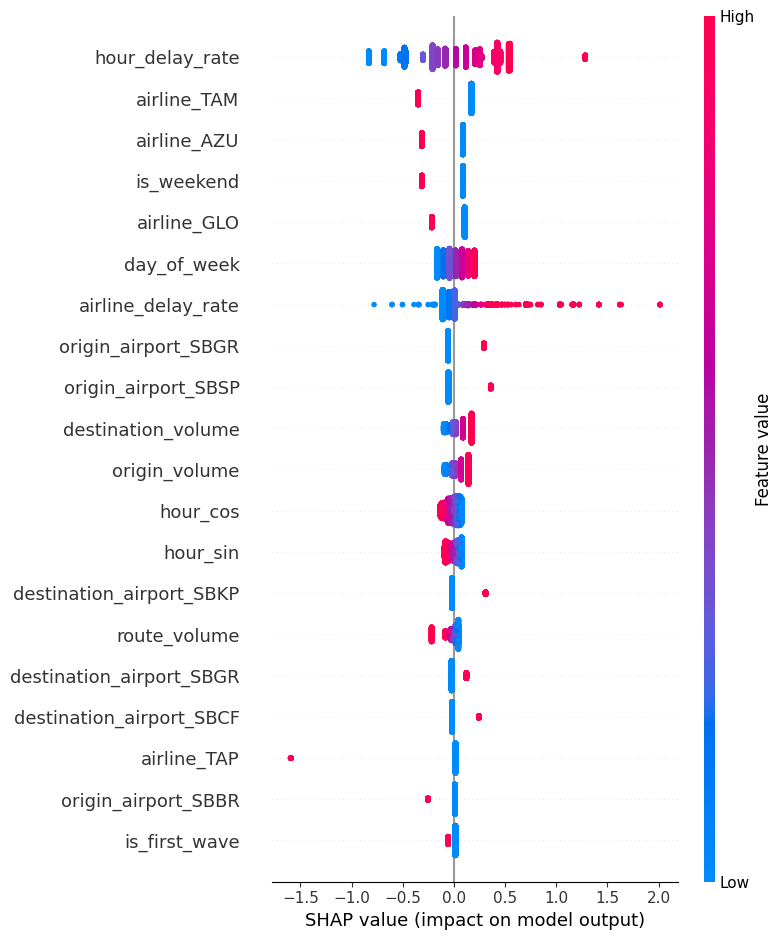

In [65]:
import shap
import numpy as np
import pandas as pd

# Transformar X_test pelo preprocessor
X_test_transformed = rl_model.named_steps['preprocessor'].transform(X_test)

# Amostragem
sample_size = 5000
idx = np.random.choice(X_test_transformed.shape[0], sample_size, replace=False)
X_sample = X_test_transformed[idx]

# SHAP Explainer
explainer_rl = shap.LinearExplainer(
    rl_model.named_steps['classifier'],
    X_sample
)

shap_values_rl = explainer_rl.shap_values(X_sample)

# 🔥 Converter para DataFrame para ter cores
if hasattr(X_sample, "toarray"):
    X_sample_dense = X_sample.toarray()
else:
    X_sample_dense = X_sample

X_sample_df = pd.DataFrame(
    X_sample_dense,
    columns=all_features
)

# Plot colorido
shap.summary_plot(
    shap_values_rl,
    X_sample_df
)

feature importance Xgb

In [66]:
xgb = pipeline_xgb.named_steps['model']

importance_df = pd.DataFrame({
    "feature": all_features,
    "importance": xgb.feature_importances_
}).sort_values(by="importance", ascending=False)

importance_df.to_csv('importance_xgb.csv', index=False)
importance_df

,feature,importance
6,airline_delay_rate,0.026715
214,origin_airport_LPPT,0.023850
126,airline_TTL,0.018493
7,hour_delay_rate,0.016979
114,airline_SKU,0.016050
...,...,...
427,origin_airport_SOCA,0.000000
429,origin_airport_SPQT,0.000000
430,origin_airport_SPSO,0.000000
431,origin_airport_SSBL,0.000000


In [67]:
importance_nonzero = importance_df[
    importance_df['importance'] > 0
].sort_values(by='importance', ascending=False)

importance_nonzero.sort_values(by='importance', ascending=False)
importance_nonzero.to_csv('importance_nonzero_xgb.csv', index=False)
importance_nonzero


,feature,importance
6,airline_delay_rate,0.026715
214,origin_airport_LPPT,0.023850
126,airline_TTL,0.018493
7,hour_delay_rate,0.016979
114,airline_SKU,0.016050
...,...,...
812,destination_airport_SWPI,0.000109
649,destination_airport_SBJV,0.000103
84,airline_LAE,0.000090
339,origin_airport_SBSJ,0.000076


Shap xgb

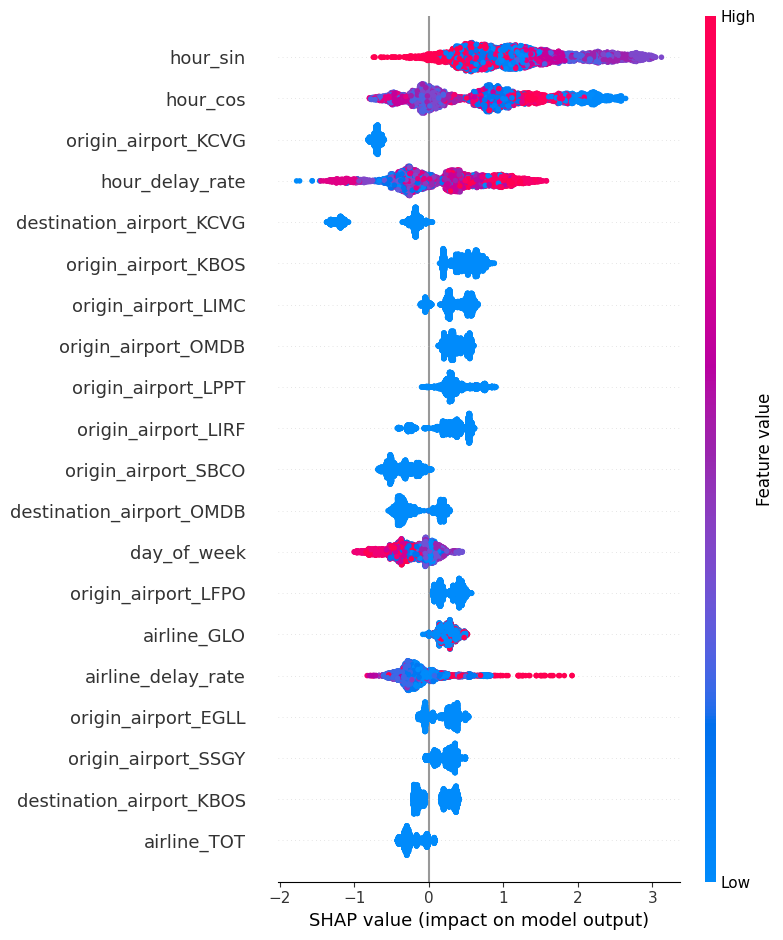

In [68]:
import shap
import numpy as np
import pandas as pd

# 🔹 Amostragem
sample_size = 5000
idx = np.random.choice(X_test.shape[0], sample_size, replace=False)

X_sample_raw = X_test.iloc[idx]

# 🔹 Transformar pelo preprocessor
X_sample_transformed = pipeline_xgb.named_steps['preprocessor'].transform(X_sample_raw)

# 🔹 Converter para dense se for sparse
if hasattr(X_sample_transformed, "toarray"):
    X_sample_dense = X_sample_transformed.toarray()
else:
    X_sample_dense = X_sample_transformed

# 🔹 Criar DataFrame com nomes corretos
X_sample_df = pd.DataFrame(
    X_sample_dense,
    columns=all_features
)

# 🔹 Criar explainer
explainer_xgb = shap.TreeExplainer(pipeline_xgb.named_steps['model'])

# 🔹 Calcular shap values
shap_values_xgb = explainer_xgb.shap_values(X_sample_df)

# 🔹 Summary plot colorido
shap.summary_plot(shap_values_xgb, X_sample_df)

shap individual

In [69]:
# 🔹 Adicionar probabilidade ao test_df
test_df_probs = X_test.copy()
test_df_probs["is_delayed"] = y_test
test_df_probs["prob_delay"] = pipeline_xgb.predict_proba(X_test)[:,1]

# 🔹 Caso atraso com maior probabilidade
case_delay = test_df_probs[
    test_df_probs["is_delayed"] == 1
].sort_values("prob_delay", ascending=False).iloc[0]

# 🔹 Caso não atraso com menor probabilidade
case_no_delay = test_df_probs[
    test_df_probs["is_delayed"] == 0
].sort_values("prob_delay", ascending=True).iloc[0]

# 🔹 Separar X
case_delay_X = case_delay.drop(["is_delayed", "prob_delay"]).to_frame().T
case_no_delay_X = case_no_delay.drop(["is_delayed", "prob_delay"]).to_frame().T

# 🔹 Ajustar dtype
case_delay_X = case_delay_X[X_test.columns].astype(X_test.dtypes.to_dict())
case_no_delay_X = case_no_delay_X[X_test.columns].astype(X_test.dtypes.to_dict())

print("Prob delay escolhida:", case_delay["prob_delay"])
print("Prob no delay escolhida:", case_no_delay["prob_delay"])

Prob delay escolhida: 0.97407055
Prob no delay escolhida: 0.036219247


In [70]:
case_delay_X

,airline,origin_airport,destination_airport,day_of_week,is_weekend,is_holiday,is_pre_holiday,is_post_holiday,hour_sin,hour_cos,is_first_wave,is_last_wave,origin_volume,destination_volume,route_volume,airline_delay_rate,hour_delay_rate
2805058,AEA,LEMD,SBGR,4.0,0,0,0,0,-0.707107,0.707107,0,1,5884.0,399102.0,4314.0,0.597484,0.221591


In [71]:
case_no_delay_X

,airline,origin_airport,destination_airport,day_of_week,is_weekend,is_holiday,is_pre_holiday,is_post_holiday,hour_sin,hour_cos,is_first_wave,is_last_wave,origin_volume,destination_volume,route_volume,airline_delay_rate,hour_delay_rate
2853546,TAM,SBRJ,SBSP,5.0,1,1,0,0,0.965926,0.258819,1,0,108990.0,276071.0,54021.0,0.168783,0.053112


SHAP individual Regressão logistica

Case delay

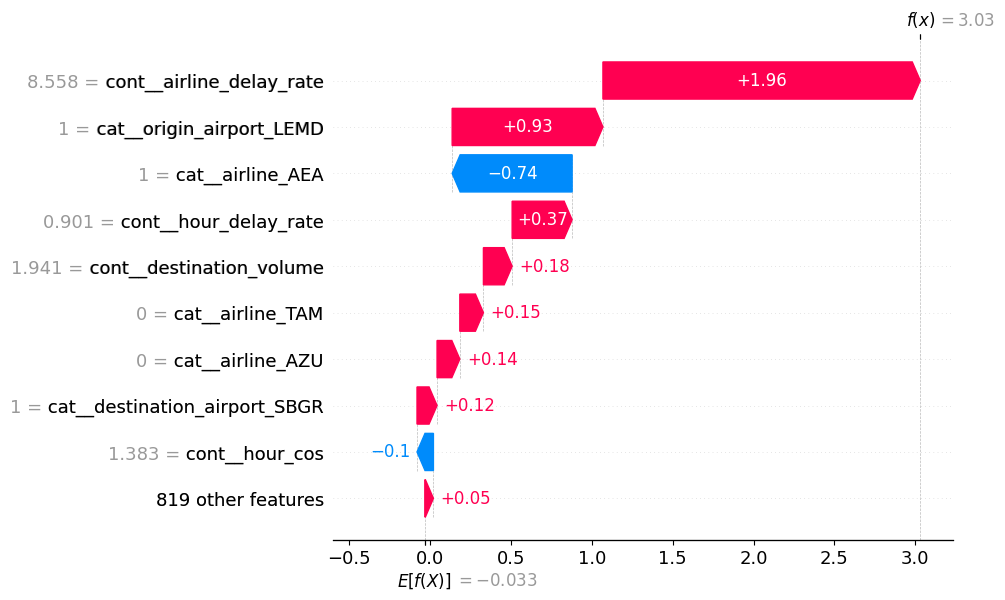

In [72]:
import shap
import numpy as np
import pandas as pd

# 🔹 Extrair nomes reais das features do preprocessor
feature_names = rl_model.named_steps['preprocessor'].get_feature_names_out()

# 🔹 Background
background_idx = np.random.choice(X_train.shape[0], 1000, replace=False)
X_background_raw = X_train.iloc[background_idx]
X_background_transformed = rl_model.named_steps['preprocessor'].transform(X_background_raw)

if hasattr(X_background_transformed, "toarray"):
    X_background = X_background_transformed.toarray()
else:
    X_background = X_background_transformed

# 🔹 Caso individual
X_case_transformed = rl_model.named_steps['preprocessor'].transform(case_delay_X)

if hasattr(X_case_transformed, "toarray"):
    X_case = X_case_transformed.toarray()
else:
    X_case = X_case_transformed

# 🔹 Criar DataFrame COM NOMES
X_case_df = pd.DataFrame(
    X_case,
    columns=feature_names
)

# 🔹 Criar explainer
explainer_rl = shap.LinearExplainer(
    rl_model.named_steps['classifier'],
    X_background
)

# 🔹 SHAP values
shap_values_rl = explainer_rl(X_case_df)



# 🔹 Waterfall com nomes corretos
shap.plots.waterfall(
    shap_values_rl[0],
    max_display=10
)

Case no delay

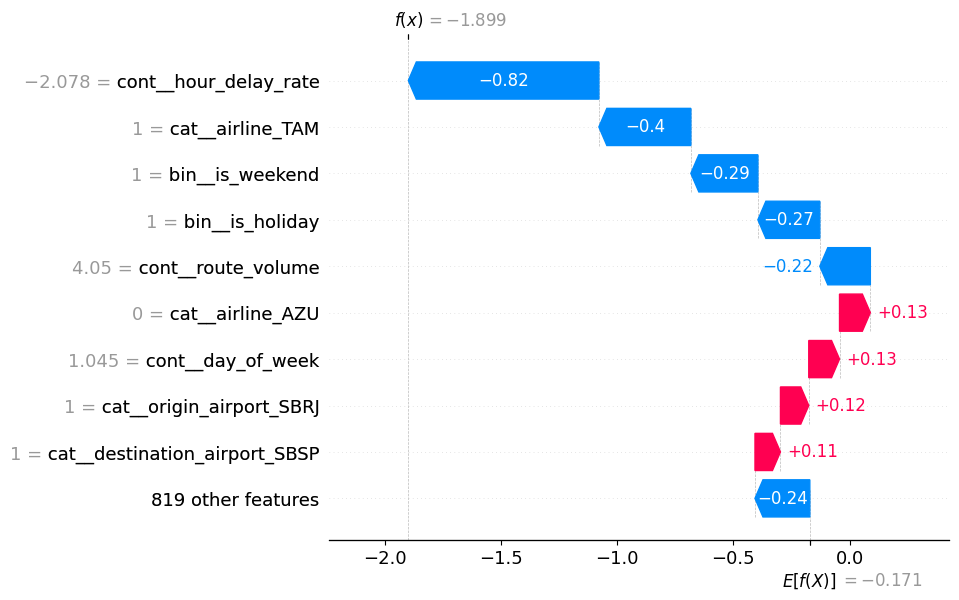

In [73]:
import shap
import numpy as np
import pandas as pd

# 🔹 Extrair nomes reais das features do preprocessor
feature_names = rl_model.named_steps['preprocessor'].get_feature_names_out()

# 🔹 Background
background_idx = np.random.choice(X_train.shape[0], 1000, replace=False)
X_background_raw = X_train.iloc[background_idx]
X_background_transformed = rl_model.named_steps['preprocessor'].transform(X_background_raw)

if hasattr(X_background_transformed, "toarray"):
    X_background = X_background_transformed.toarray()
else:
    X_background = X_background_transformed

# 🔹 Caso individual
X_case_transformed = rl_model.named_steps['preprocessor'].transform(case_no_delay_X)

if hasattr(X_case_transformed, "toarray"):
    X_case = X_case_transformed.toarray()
else:
    X_case = X_case_transformed

# 🔹 Criar DataFrame COM NOMES
X_case_df = pd.DataFrame(
    X_case,
    columns=feature_names
)

# 🔹 Criar explainer
explainer_rl = shap.LinearExplainer(
    rl_model.named_steps['classifier'],
    X_background
)

# 🔹 SHAP values
shap_values_rl = explainer_rl(X_case_df)

# 🔹 Waterfall com nomes corretos
shap.plots.waterfall(
    shap_values_rl[0],
    max_display=10
)

SHAP individual Xgboost

Case delay

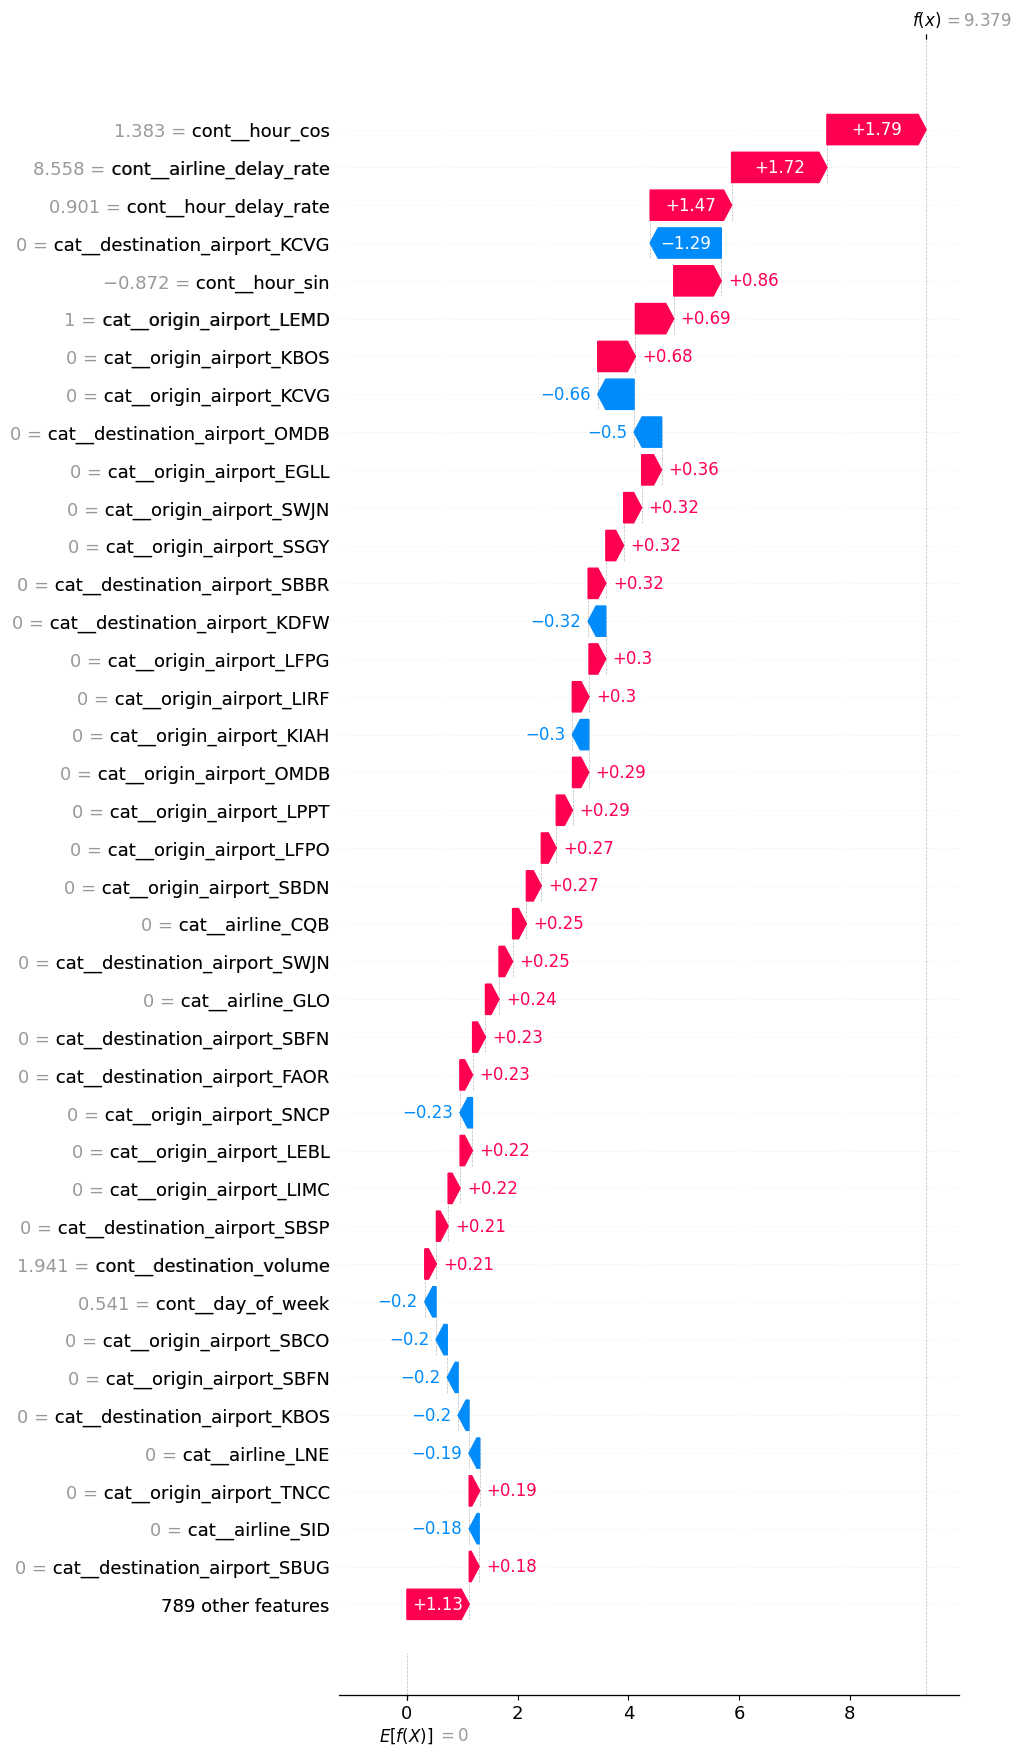

In [74]:
import shap
import numpy as np
import pandas as pd

# 🔹 Extrair nomes reais das features
feature_names = pipeline_xgb.named_steps['preprocessor'].get_feature_names_out()

# 🔹 Transformar caso individual
X_case_transformed = pipeline_xgb.named_steps['preprocessor'].transform(case_delay_X)

# 🔹 Converter para dense se necessário
if hasattr(X_case_transformed, "toarray"):
    X_case = X_case_transformed.toarray()
else:
    X_case = X_case_transformed

# 🔹 Criar DataFrame com nomes corretos
X_case_df = pd.DataFrame(
    X_case,
    columns=feature_names
)

# 🔹 Criar explainer (TreeExplainer)
explainer_xgb = shap.TreeExplainer(
    pipeline_xgb.named_steps['model']
)

# 🔹 Calcular shap values
shap_values_xgb = explainer_xgb(X_case_df)

# 🔹 Waterfall plot
shap.plots.waterfall(
    shap_values_xgb[0],
    max_display=40
)

Case no delay

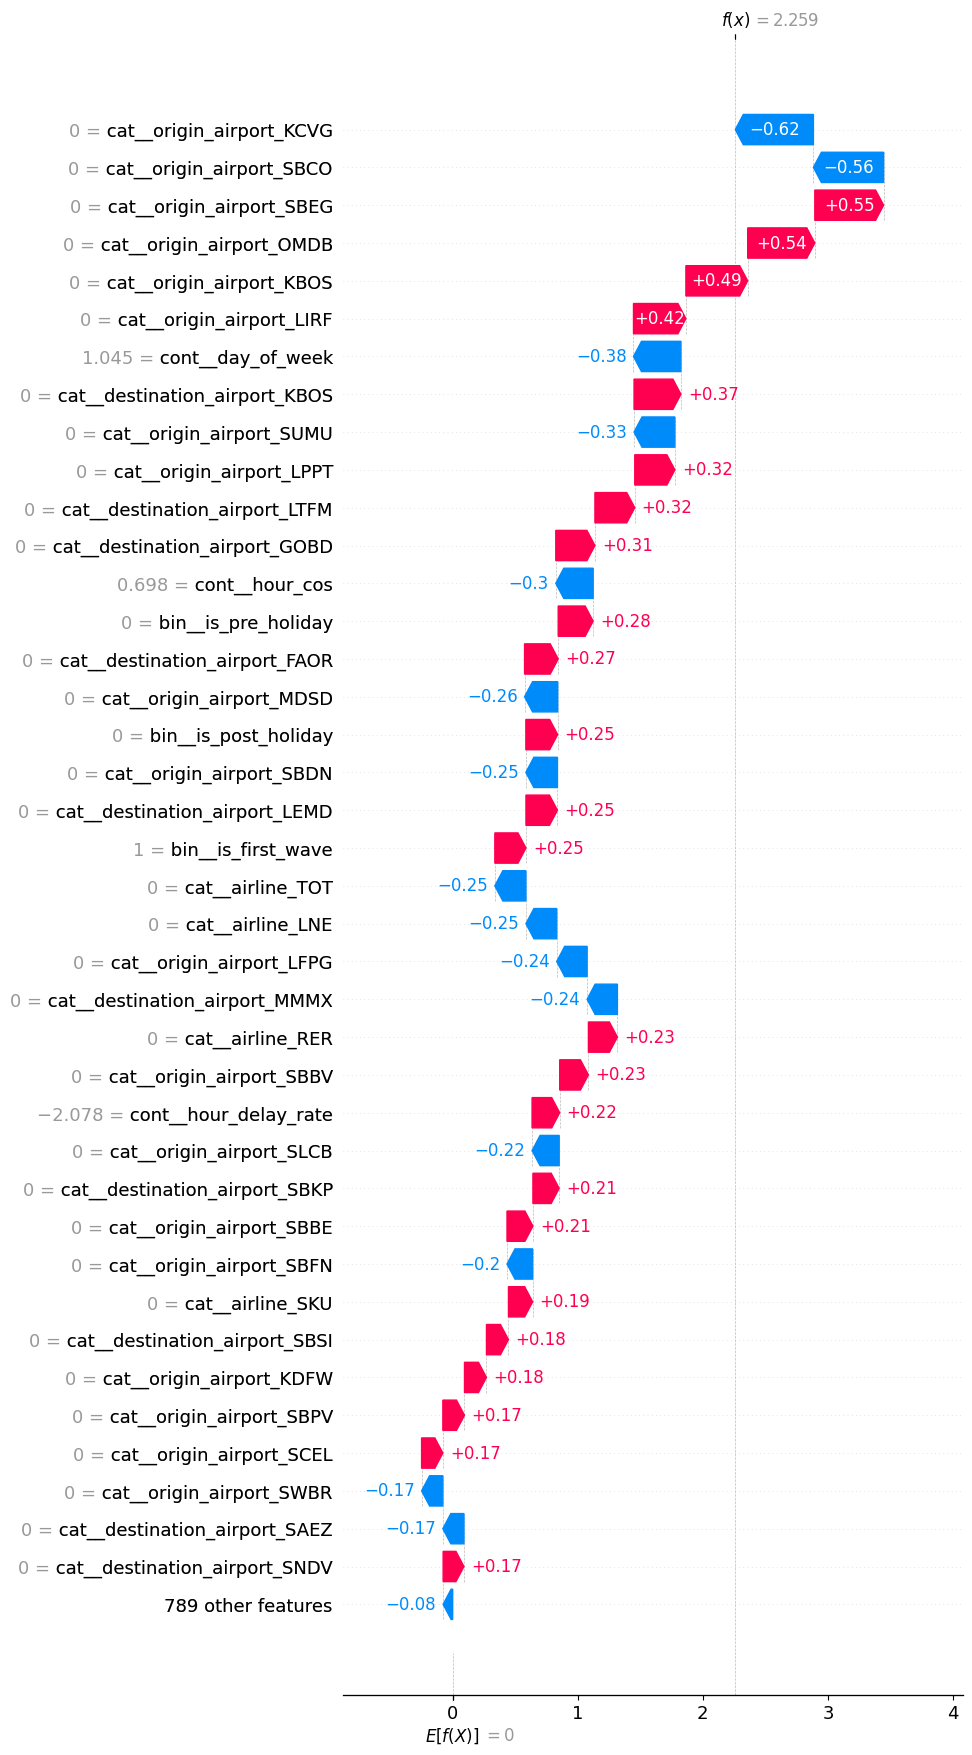

In [75]:
import shap
import numpy as np
import pandas as pd

# 🔹 Extrair nomes reais das features
feature_names = pipeline_xgb.named_steps['preprocessor'].get_feature_names_out()

# 🔹 Transformar caso individual
X_case_transformed = pipeline_xgb.named_steps['preprocessor'].transform(case_no_delay_X)

# 🔹 Converter para dense se necessário
if hasattr(X_case_transformed, "toarray"):
    X_case = X_case_transformed.toarray()
else:
    X_case = X_case_transformed

# 🔹 Criar DataFrame com nomes corretos
X_case_df = pd.DataFrame(
    X_case,
    columns=feature_names
)

# 🔹 Criar explainer (TreeExplainer)
explainer_xgb = shap.TreeExplainer(
    pipeline_xgb.named_steps['model']
)

# 🔹 Calcular shap values
shap_values_xgb = explainer_xgb(X_case_df)

# 🔹 Waterfall plot
shap.plots.waterfall(
    shap_values_xgb[0],
    max_display=40
)

In [76]:
import numpy as np
from scipy.special import expit

model = pipeline_xgb.named_steps['model']

# Transformar o mesmo caso
X_transformed = pipeline_xgb.named_steps['preprocessor'].transform(case_no_delay_X)

if hasattr(X_transformed, "toarray"):
    X_transformed = X_transformed.toarray()

# 1️⃣ Margem direta do modelo
margin_direct = model.predict(X_transformed, output_margin=True)[0]

# 2️⃣ Probabilidade via margem
prob_from_margin = expit(margin_direct)

# 3️⃣ Probabilidade via predict_proba do MODELO isolado
prob_model_only = model.predict_proba(X_transformed)[0,1]

# 4️⃣ Probabilidade via PIPELINE
prob_pipeline = pipeline_xgb.predict_proba(case_no_delay_X)[0,1]

print("Margin direta:", margin_direct)
print("Prob via expit(margin):", prob_from_margin)
print("Prob via model.predict_proba:", prob_model_only)

Margin direta: 2.259365
Prob via expit(margin): 0.9054553
Prob via model.predict_proba: 0.9054553


## Joblib

In [78]:
import joblib

joblib.dump(pipeline_xgb, "xgb_pipeline.pkl")

['xgb_pipeline.pkl']

## Wrapper

In [94]:
%%writefile model_wrapper.py

import joblib
import shap
import numpy as np
import pandas as pd


class FlightDelayPredictor:

    def __init__(self, model_path: str, threshold: float = 0.5):
        """
        model_path: caminho do pipeline salvo (.pkl)
        threshold: limite mínimo para classificar como delay
        """
        self.pipeline = joblib.load(model_path)
        self.threshold = threshold

        self.preprocessor = self.pipeline.named_steps["preprocessor"]
        self.model = self.pipeline.named_steps["model"]

        # SHAP explainer
        self.explainer = shap.TreeExplainer(self.model)

        self.feature_names = self.preprocessor.get_feature_names_out()

    # ====================================================
    # 🔹 Converter hora → sin/cos (ANTES do pipeline)
    # ====================================================
    def _encode_hour(self, hour: int):
        hour_sin = np.sin(2 * np.pi * hour / 24)
        hour_cos = np.cos(2 * np.pi * hour / 24)
        return hour_sin, hour_cos

    # ====================================================
    # 🔹 Preparar input para pipeline
    # ====================================================
    def _prepare_input(self, input_data: dict):

        if "hour" not in input_data:
            raise ValueError("Input must contain 'hour' field.")

        input_copy = input_data.copy()

        hour = input_copy.pop("hour")

        hour_sin, hour_cos = self._encode_hour(hour)

        input_copy["hour_sin"] = hour_sin
        input_copy["hour_cos"] = hour_cos

        X = pd.DataFrame([input_copy])

        return X

    # ====================================================
    # 🔹 Predict com threshold customizado
    # ====================================================
    def predict(self, input_data: dict):

        X = self._prepare_input(input_data)

        probs = self.pipeline.predict_proba(X)[0]

        prob_no_delay = float(probs[0])
        prob_delay = float(probs[1])

        predicted_class = int(prob_delay >= self.threshold)
        label = "Delayed" if predicted_class == 1 else "On Time"

        return {
            "prediction": predicted_class,
            "label": label,
            "probability_delay": prob_delay,
            "probability_no_delay": prob_no_delay,
            "threshold_used": self.threshold
        }

    # ====================================================
    # 🔹 SHAP Explain
    # ====================================================
    def explain(self, input_data: dict, top_n: int = 10):

        X = self._prepare_input(input_data)

        # transformar manualmente (igual pipeline faz internamente)
        X_transformed = self.preprocessor.transform(X)

        if hasattr(X_transformed, "toarray"):
            X_transformed = X_transformed.toarray()

        shap_values = self.explainer(X_transformed)
        values = shap_values.values[0]

        idx_sorted = np.argsort(np.abs(values))[::-1]

        top_features = []

        for i in idx_sorted:
            feature_name = self.feature_names[i]

            # remover sin/cos da explicação para humano
            if "hour_sin" in feature_name or "hour_cos" in feature_name:
                continue

            top_features.append({
                "feature": feature_name,
                "impact": float(values[i])
            })

            if len(top_features) >= top_n:
                break

        return top_features

    # ====================================================
    # 🔹 Resposta completa
    # ====================================================
    def predict_with_explanation(self, input_data: dict, top_n: int = 10):

        prediction_output = self.predict(input_data)
        shap_output = self.explain(input_data, top_n=top_n)

        return {
            **prediction_output,
            "departure_hour": input_data["hour"],
            "top_factors": shap_output
        }

Overwriting model_wrapper.py


Teste

In [1]:
from model_wrapper import FlightDelayPredictor

# ======================================================
# 🔹 Instanciar wrapper (carrega automaticamente o .pkl)
# ======================================================
predictor = FlightDelayPredictor(
    model_path="xgb_pipeline.pkl",  # ajuste se estiver em pasta models/
    threshold=0.5
)

# ======================================================
# 🔴 CASO DELAY (mesmo exemplo do notebook)
# ======================================================
case_delay = {
    "airline": "AEA",
    "origin_airport": "LEMD",
    "destination_airport": "SBGR",
    "hour": 22,  # usuário envia hora normal (0–23)
    "day_of_week": 4.0,
    "is_weekend": 0,
    "is_holiday": 0,
    "is_pre_holiday": 0,
    "is_post_holiday": 0,
    "is_first_wave": 0,
    "is_last_wave": 1,
    "origin_volume": 5884.0,
    "destination_volume": 399102.0,
    "route_volume": 4314.0,
    "airline_delay_rate": 0.5974842767295597,
    "hour_delay_rate": 0.221591059442009
}

print("\n==============================")
print("🚨 TESTE REAL - DELAY")
print("==============================")

result_delay = predictor.predict_with_explanation(case_delay, top_n=5)
print(result_delay)


# ======================================================
# 🟢 CASO NO DELAY (exemplo do notebook)
# ======================================================
case_no_delay = {
    "airline": "TAM",
    "origin_airport": "SBRJ",
    "destination_airport": "SBSP",
    "hour": 9,
    "day_of_week": 5.0,
    "is_weekend": 1,
    "is_holiday": 1,
    "is_pre_holiday": 0,
    "is_post_holiday": 0,
    "is_first_wave": 1,
    "is_last_wave": 0,
    "origin_volume": 108990.0,
    "destination_volume": 276071.0,
    "route_volume": 54021.0,
    "airline_delay_rate": 0.1687829774799002,
    "hour_delay_rate": 0.05311182742375403
}

print("\n==============================")
print("✅ TESTE REAL - NO DELAY")
print("==============================")

result_no_delay = predictor.predict_with_explanation(case_no_delay, top_n=5)
print(result_no_delay)


🚨 TESTE REAL - DELAY
{'prediction': 1, 'label': 'Delayed', 'probability_delay': 0.9739015102386475, 'probability_no_delay': 0.02609848976135254, 'threshold_used': 0.5, 'departure_hour': 22, 'top_factors': [{'feature': 'cont__airline_delay_rate', 'impact': 1.7728254795074463}, {'feature': 'cont__hour_delay_rate', 'impact': 1.3325977325439453}, {'feature': 'cat__origin_airport_KCVG', 'impact': -0.778443455696106}, {'feature': 'cat__origin_airport_KBOS', 'impact': 0.7700471878051758}, {'feature': 'cat__origin_airport_LEMD', 'impact': 0.6610777378082275}]}

✅ TESTE REAL - NO DELAY
{'prediction': 0, 'label': 'On Time', 'probability_delay': 0.05215824022889137, 'probability_no_delay': 0.9478417634963989, 'threshold_used': 0.5, 'departure_hour': 9, 'top_factors': [{'feature': 'cont__day_of_week', 'impact': -0.696151077747345}, {'feature': 'cont__hour_delay_rate', 'impact': 0.6357279419898987}, {'feature': 'cat__origin_airport_KCVG', 'impact': -0.628991961479187}, {'feature': 'cat__origin_air